<a href="https://colab.research.google.com/github/abdelrahmanfekri/FacewatchNotebook/blob/main/Fatigue_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

load data from kaggle using kaggle api

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"abdelrahmanfakre","key":"e035509e2d3e50ef6cb77956beeba582"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d timmjy/fatigue-detection

100% 835M/836M [00:29<00:00, 34.8MB/s]
100% 836M/836M [00:29<00:00, 30.0MB/s]


In [ ]:
!unzip fatigue-detection.zip

Archive:  fatigue-detection.zip
  inflating: output/test/alert/002_frame8.jpg  
  inflating: output/test/alert/003_frame16.jpg  
  inflating: output/test/alert/003_frame17.jpg  
  inflating: output/test/alert/004_frame11.jpg  
  inflating: output/test/alert/004_frame21.jpg  
  inflating: output/test/alert/005_frame0.jpg  
  inflating: output/test/alert/005_frame15.jpg  
  inflating: output/test/alert/005_frame17.jpg  
  inflating: output/test/alert/005_frame20.jpg  
  inflating: output/test/alert/005_frame7.jpg  
  inflating: output/test/alert/006_frame11.jpg  
  inflating: output/test/alert/006_frame12.jpg  
  inflating: output/test/alert/006_frame3.jpg  
  inflating: output/test/alert/006_frame9.jpg  
  inflating: output/test/alert/007_frame5.jpg  
  inflating: output/test/alert/007_frame8.jpg  
  inflating: output/test/alert/007_frame9.jpg  
  inflating: output/test/alert/008_frame10.jpg  
  inflating: output/test/alert/008_frame17.jpg  
  inflating: output/test/alert/008_frame29.jp

In [ ]:
!pip install retinaface

In [ ]:
import cv2
import os

Face detection using retinaface

In [ ]:
from retinaface import RetinaFace
detector = RetinaFace()

model[normal quality] init ..
model success !


In [ ]:
# generate face dataset

# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier('path/to/haarcascade_frontalface_default.xml')

dataset_folder = "/content/drive/MyDrive/FatigueDetection/dataset"
face_dataset_folder = "/content/drive/MyDrive/FatigueDetection/face_dataset"
for dir_name in os.listdir(dataset_folder):
    new_dir = os.path.join(face_dataset_folder,dir_name)
    if not os.path.exists(new_dir):
      # Create new directory
      os.mkdir(new_dir)
    for sub_dir_name in os.listdir(os.path.join(dataset_folder,dir_name)):
      new_sub_dir = os.path.join(new_dir , sub_dir_name)
      if not os.path.exists(new_sub_dir):
        os.mkdir(new_sub_dir)
      for image_file in os.listdir(os.path.join(dataset_folder,dir_name,sub_dir_name)):
        if image_file.endswith(".jpg") or image_file.endswith(".png"):
          img = cv2.imread(os.path.join(dataset_folder,dir_name,sub_dir_name,image_file))
          image_path = os.path.join(new_sub_dir, image_file)
          if os.path.exists(image_path):
            continue
          gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

          faces = detector.predict(img)

          for i,face in enumerate(faces):
            # Extract the coordinates of the face bounding box
            x1 = face.get("x1")
            y1 = face.get("y1")
            x2 = face.get("x2")
            y2 = face.get("y2")
            # Draw the face bounding box on the input image
            face_image = img[y1:y2,x1:x2]
            if face_image.size != 0:
              face_filename = f'{image_path}_{i}.jpg'
              face_path = os.path.join(dataset_folder, face_filename)
              cv2.imwrite(face_path, face_image)


In [ ]:
# load data
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_data_dir = "/content/drive/MyDrive/FatigueDetection/face_dataset/train"
test_data_dir = "/content/drive/MyDrive/FatigueDetection/face_dataset/test"
val_data_dir = "/content/drive/MyDrive/FatigueDetection/face_dataset/val"

img_rows = 160
img_cols = 160
batch_size = 32
train_data = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    image_size=[img_rows, img_cols],
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
)
test_data = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    image_size=[img_rows, img_cols],
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
)

val_data = image_dataset_from_directory(
    val_data_dir,
    labels='inferred',
    image_size=[img_rows, img_cols],
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
)


Found 3067 files belonging to 3 classes.
Found 391 files belonging to 3 classes.
Found 382 files belonging to 3 classes.


In [ ]:
train_data.class_names

['alert', 'non_vigilant', 'tired']

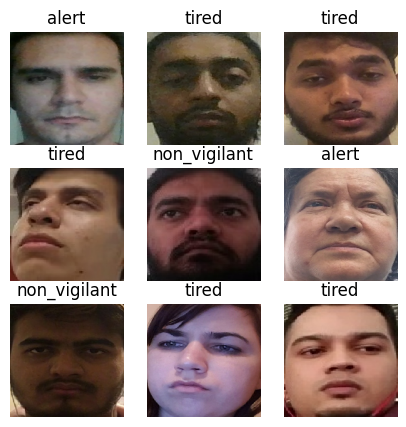

In [ ]:
# display a portion of the dataset
for images, labels in train_data.take(1):
  fig, axs = plt.subplots(3,3, figsize =(5,5))
  axs = axs.flatten()
  idx = 0
  for img, ax in zip(images[:9], axs):
    ax.imshow(img.numpy().astype("uint8"))
    ax.set_title(train_data.class_names[labels[idx]])
    idx+=1
    ax.axis('off')
  plt.show()

Features detection using FaceNet

In [ ]:
pip install keras-facenet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.7 MB/s eta 0:00:00
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=acb50ba159bef51db4ecf8dfc9bc312ce50f82c6b0dbe82ca7c2b1922739dfc7
  Stored in directory: /root/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

In [ ]:
# Load an image for testing example how to use facenet
import numpy as np
img = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/FatigueDetection/face_dataset/test/alert/002_frame8.jpg_0.jpg', target_size=(160, 160))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.keras.applications.imagenet_utils.preprocess_input(img_array)
embeddings = embedder.embeddings(np.array([img_array]))

1/1 [==============================] - 2s 2s/step


In [ ]:
# load images

train_images = []
train_labels = []
test_images = []
test_labels = []
val_images = []
val_labels = []


for image_batch, label_batch in train_data:
  for image in image_batch:
    train_images.append(image.numpy())
  for label in label_batch:
    train_labels.append(label.numpy())

for image_batch, label_batch in test_data:
  for image in image_batch:
    test_images.append(image.numpy())
  for label in label_batch:
    test_labels.append(label.numpy())

for image_batch, label_batch in val_data:
  for image in image_batch:
    val_images.append(image.numpy())
  for label in label_batch:
    val_labels.append(label.numpy())

test_images = np.array(test_images)
train_images = np.array(train_images)
val_images = np.array(val_images)
test_labels = np.array(test_labels)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(val_images.shape)
print(val_labels.shape)

(3067, 160, 160, 3)
(3067,)
(391, 160, 160, 3)
(391,)
(382, 160, 160, 3)
(382,)


In [ ]:
train_images_features = embedder.embeddings(train_images)
test_images_features = embedder.embeddings(test_images)
val_images_features = embedder.embeddings(val_images)

12/12 [==============================] - 1s 128ms/step


In [ ]:
print(train_images_features.shape)
print(test_images_features.shape)
print(val_images_features.shape)

(3067, 512)
(391, 512)
(382, 512)


train k-nn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
accuracy_list = []
n_neighbors = [1 , 3, 5, 7 , 9]
for n in n_neighbors:
  acc = []
  knn = KNeighborsClassifier(n_neighbors= n)
  knn.fit(train_images_features.tolist(), train_labels.tolist())
  y_pred = knn.predict(train_images_features.tolist())
  acc.append(accuracy_score(train_labels.tolist(),y_pred))
  y_pred = knn.predict(test_images_features.tolist())
  acc.append(accuracy_score(test_labels.tolist(), y_pred))
  y_pred = knn.predict(val_images_features.tolist())
  acc.append(accuracy_score(val_labels.tolist(), y_pred))
  accuracy_list.append(acc)


In [ ]:
accuracy_list

[[1.0, 0.979539641943734, 0.9947643979057592],
 [0.9925008151287904, 0.9769820971867008, 0.9895287958115183],
 [0.9889142484512553, 0.9769820971867008, 0.9738219895287958],
 [0.9853276817737202, 0.9769820971867008, 0.9685863874345549],
 [0.9827192696446039, 0.9718670076726342, 0.9633507853403142]]

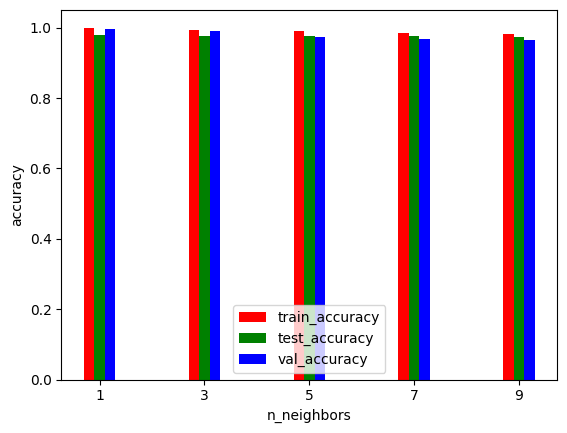

In [ ]:
import matplotlib.pyplot as plt

# data
x = [1 , 3, 5, 7 , 9]
colors = ['red', 'green', 'blue']
width = 0.2
acc_trans = list(map(list,zip(*accuracy_list)))

for i , y in enumerate(acc_trans):
  pos = np.array(x) + i * width - width

  plt.bar(pos, y, width= width, color= colors[i% len(colors)])

# add labels and title
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend(["train_accuracy", "test_accuracy", "val_accuracy"])
plt.xticks(x)
plt.show()

SVM train

In [ ]:
from sklearn import svm

accuracy_list = []
kernels = ["linear", "poly", "rbf"]
for kernel in kernels:
  clf = svm.SVC(kernel=kernel)
  clf.fit(train_images_features.tolist(), train_labels.tolist())
  acc = []
  acc.append(clf.score(train_images_features.tolist(), train_labels.tolist()))
  acc.append(clf.score(test_images_features.tolist(), test_labels.tolist()))
  acc.append(clf.score(val_images_features.tolist(), val_labels.tolist()))
  accuracy_list.append(acc)

In [ ]:
print(accuracy_list)

[[0.5402673622432345, 0.5089514066496164, 0.5314136125654451], [0.9921747636126508, 0.9718670076726342, 0.9738219895287958], [0.9797848059993479, 0.9565217391304348, 0.9476439790575916]]


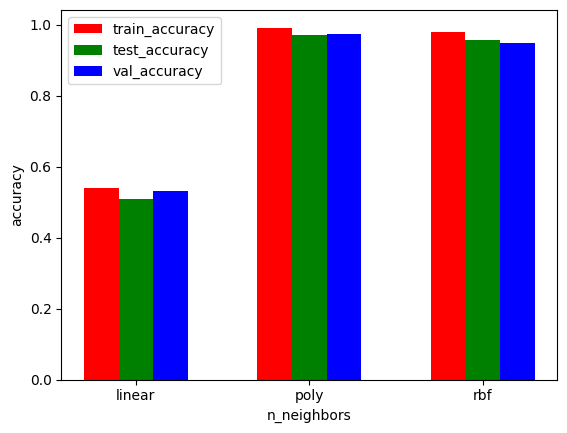

In [ ]:
import matplotlib.pyplot as plt

# data
x = ["linear", "poly", "rbf"]
colors = ['red', 'green', 'blue']
width = 0.2
acc_trans = list(map(list,zip(*accuracy_list)))

for i , y in enumerate(acc_trans):
  pos = np.arange(len(x)) + i * width - width

  plt.bar(pos, y, width= width, color= colors[i% len(colors)])

# add labels and title
plt.xlabel('kernal')
plt.ylabel('accuracy')
plt.legend(["train_accuracy", "test_accuracy", "val_accuracy"])
plt.xticks(np.arange(len(x)), labels = x)
plt.show()

Conclusion:

Based on the experiments, K-NN outperformed SVM in terms of classification accuracy on the given dataset. We recommend using the K-NN model with n_neighbors = 1 for making predictions on new data.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train_images_features, train_labels)
joblib.dump(knn, "knn_model.joblib")

['knn_model.joblib']

In [ ]:
from sklearn.metrics import accuracy_score

knn = joblib.load("knn_model.joblib")

y_pred = knn.predict(test_images_features)
print(accuracy_score(test_labels, y_pred))

0.979539641943734


In [ ]:
plt.imshow()